# Survey Participants

This notebooks visualizes some participant information from the survey.

* _Input:_ Clean .csv from Qualtrics with location, activity and occupancy questions
* _Output:_ Saves a .csv to disk, exports graphs as .jpg

**Tasks:** 
* Plots a distribution of locations
* Plots a distribution of activity days weekly
* Plots the descriptions of occupancy in current space

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [105]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [106]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [107]:
# External libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Load the clean csv

In [108]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'survey-data/survey-participants.csv'

full_data = import_csv(file)
print(full_data)

             StartDate              EndDate      Status       IPAddress  \
0  2024-03-28 14:03:09  2024-03-28 14:05:45  IP Address  145.109.22.122   
1  2024-03-28 14:04:50  2024-03-28 14:07:54  IP Address   145.109.9.173   
2  2024-03-28 14:07:44  2024-03-28 14:08:44  IP Address   80.233.53.168   
3  2024-03-28 14:09:29  2024-03-28 14:10:39  IP Address    145.109.9.15   
4  2024-03-28 14:10:02  2024-03-28 14:11:30  IP Address   145.109.37.80   
5  2024-03-28 14:10:01  2024-03-28 14:11:34  IP Address   145.109.40.38   
6  2024-03-28 14:15:48  2024-03-28 14:17:15  IP Address   77.63.122.115   
7  2024-03-28 14:16:17  2024-03-28 14:18:01  IP Address   145.109.15.96   
8  2024-03-28 15:20:12  2024-03-28 15:22:10  IP Address     46.34.234.9   

   Progress  Duration (in seconds)  Finished         RecordedDate  \
0       100                    156      True  2024-03-28 14:05:46   
1       100                    184      True  2024-03-28 14:07:55   
2       100                     60      Tr

## Analysis of participants

### Location
**Q:** _Where are you currently located within the Lab42 building?_

       Location
0     1st floor
1     1st floor
2     1st floor
3  Ground floor
4     1st floor
5  Ground floor
6     2nd floor
7     2nd floor
8     1st floor


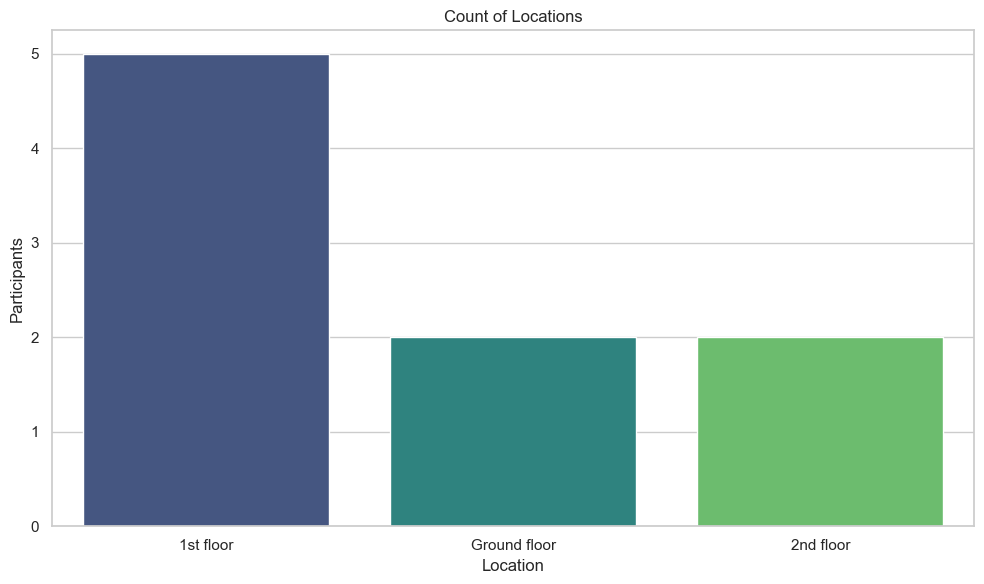

In [109]:
data = import_csv(file)

def extract_location_answers(df):
    # Select the 'Location' column
    location_column = df['Location']

    # Replace labels with simplified ones
    location_column.replace({
        'On the first floor (1st floor - in a working space)': '1st floor',
        'On the ground floor (the atrium)': 'Ground floor',
        'On the second floor (2th floor - in a working space)': '2nd floor'
    }, inplace=True)
  
    # Create a new DataFrame containing only the answers from the 'Location' column
    location_df = pd.DataFrame(location_column)

    return location_df

location_df = extract_location_answers(data)
print(location_df)

# Plot the bar graph based on the counts
def plot_location_bar_graph(df):
    location_counts = df['Location'].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=location_counts.index, y=location_counts.values, hue=location_counts.index, palette="viridis", dodge=False)
    plt.title('Count of Locations')
    plt.xlabel('Location')
    plt.ylabel('Participants')
    plt.tight_layout()

    # Save the bar chart to the 'charts' subfolder
    plt.savefig(os.path.join('survey-charts', 'location_bar_chart.png'))

    plt.plot
    
plot_location_bar_graph(location_df)

### Occupancy

**Q:** _How would you describe the occupancy in your current space?_

         Occupancy
0      Not crowded
1          Crowded
2  Not too crowded
3  Not too crowded
4      Not crowded
5      Not crowded
6  Not too crowded
7      Not crowded
8      Not crowded


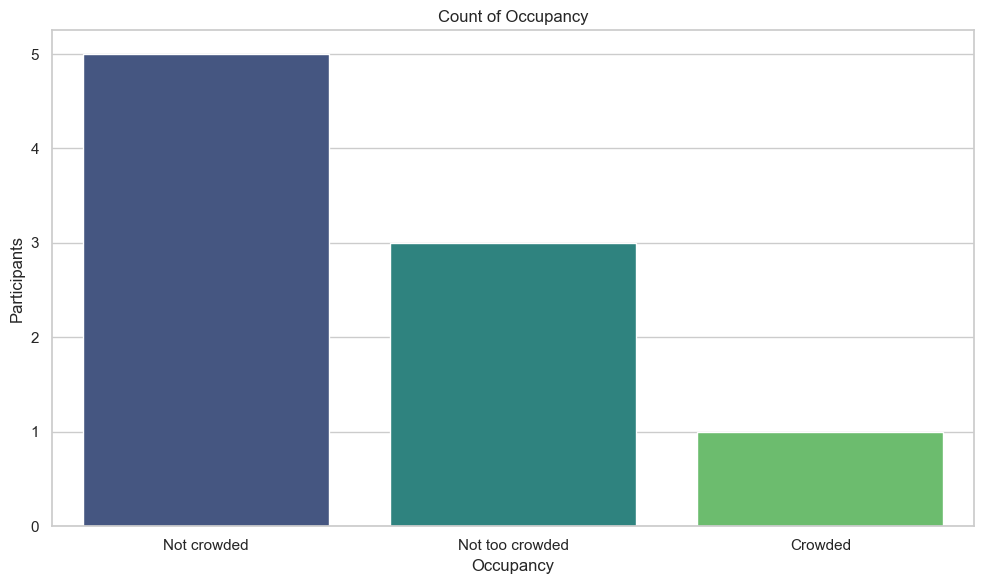

In [110]:
data = import_csv(file)

def extract_occupancy_answers(df):
    # Select the 'Occupancy' column
    occupancy_column = df['Occupancy']
  
    # Create a new DataFrame containing only the answers from the 'Occupancy' column
    occupancy_df = pd.DataFrame(occupancy_column)

    return occupancy_df

occupancy_df = extract_occupancy_answers(data)
print(occupancy_df)

def plot_occupancy_bar_graph(df):
    occupancy_counts = df['Occupancy'].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=occupancy_counts.index, y=occupancy_counts.values, hue=occupancy_counts.index, palette="viridis", dodge=False)
    plt.title('Count of Occupancy')
    plt.xlabel('Occupancy')
    plt.ylabel('Participants')
    plt.tight_layout()

    # Save the bar chart to the 'charts' subfolder
    plt.savefig(os.path.join('survey-charts', 'occupancy_bar_chart.png'))

    plt.show()

plot_occupancy_bar_graph(occupancy_df)

### Activity

**Q:** _On average, how often do you use Lab42 per week for various activities?_

        Activity
0   1 day a week
1  4 days a week
2  4 days a week
3  2 days a week
4   1 day a week
5  3 days a week
6  5 days a week
7  4 days a week
8   1 day a week


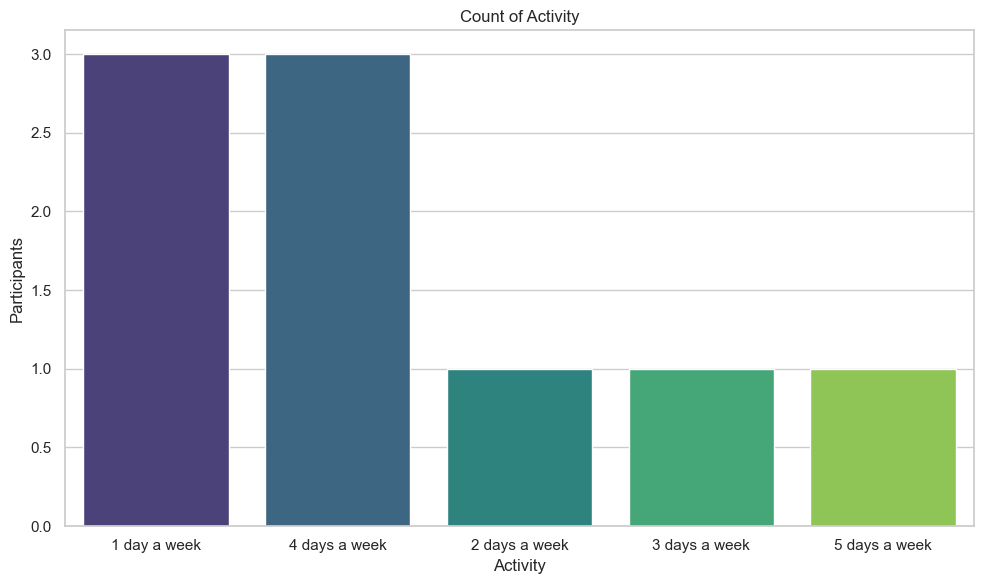

In [113]:
data = import_csv(file)

# Define the functions
def extract_activity_answers(df):
    # Select the 'Activity' column
    activity_column = df['Activity']
  
    # Create a new DataFrame containing only the answers from the 'Activity' column
    activity_df = pd.DataFrame(activity_column)

    return activity_df

activity_df = extract_activity_answers(data)
print(activity_df)    

def plot_activity_bar_graph(df):
    activity_counts = df['Activity'].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=activity_counts.index, y=activity_counts.values, hue=activity_counts.index, palette="viridis", dodge=False)
    plt.title('Count of Activity')
    plt.xlabel('Activity')
    plt.ylabel('Participants')
    plt.tight_layout()

    # Save the bar chart to the 'charts' subfolder
    plt.savefig(os.path.join('survey-charts', 'activity_bar_chart.png'))

    plt.show()

plot_activity_bar_graph(activity_df)